In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### First Glance At Data

In [2]:
data=pd.read_csv('spotify_data.csv')

In [3]:
data.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [4]:
data.columns

Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min'],
      dtype='object')

#### Handling Missing Values


In [5]:
data.isnull().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [6]:
missing_artist_name = data['artist_name'].isnull().sum()
missing_artist_genres = data['artist_genres'].isnull().sum()

total_rows = len(data)

percentage_artist_name = (missing_artist_name / total_rows) * 100
percentage_artist_genres = (missing_artist_genres / total_rows) * 100

print(f"Missing values in 'artist_name': {missing_artist_name} ({percentage_artist_name:.2f}%)")
print(f"Missing values in 'artist_genres': {missing_artist_genres} ({percentage_artist_genres:.2f}%)")

Missing values in 'artist_name': 3 (0.03%)
Missing values in 'artist_genres': 3361 (39.16%)


In [8]:
data['artist_name'] = data['artist_name'].fillna('Unknown Artist')
print("Missing values in 'artist_name' after imputation:", data['artist_name'].isnull().sum())
data['artist_genres'] = data['artist_genres'].fillna('No Genre')
print("Missing values in 'artist_genres' after imputation:", data['artist_genres'].isnull().sum())

Missing values in 'artist_name' after imputation: 0
Missing values in 'artist_genres' after imputation: 0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8582 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       8582 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [10]:
## Converting album_release_date to date time
data['album_release_date']=pd.to_datetime(data['album_release_date'])

In [11]:
### Mapping explicit column to Explicit/Non-Explicit
data.explicit=data.explicit.map({True: 'Explicit', False: 'Non-Explicit'})

## Artist with most releases

In [12]:
artist_with_most_releases=data.artist_name.value_counts().head()
print(f"Top 5 artists with most releases")
print("-"*30)
for artist,releases in artist_with_most_releases.items():
  print(f"{artist:<15} : {releases}")

Top 5 artists with most releases
------------------------------
Taylor Swift    : 324
The Weeknd      : 141
Lana Del Rey    : 99
Ariana Grande   : 94
Nirvana         : 91


Text(0, 0.5, '')

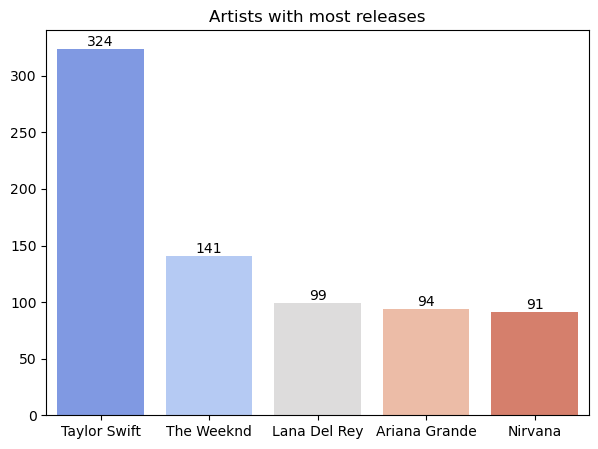

In [15]:
plt.figure(figsize=(7,5))
cn=sns.barplot(x=artist_with_most_releases.index,y=artist_with_most_releases.values,palette='coolwarm')
for container in cn.containers:
  cn.bar_label(container)
plt.title('Artists with most releases')
plt.xlabel('')
plt.ylabel('')

In [16]:
most_popular_artist = data.groupby('artist_name')['artist_popularity'].mean().round(2).sort_values(ascending=False).head(10)

print("Top 10 most popular artists are:")
print("-" * 35)

for artist, popularity in most_popular_artist.items():
    print(f"{artist:<20}: {popularity:.2f}")

Top 10 most popular artists are:
-----------------------------------
Taylor Swift        : 100.00
Bad Bunny           : 95.00
Drake               : 95.00
The Weeknd          : 93.33
Sabrina Carpenter   : 91.00
Justin Bieber       : 91.00
Rihanna             : 90.00
Billie Eilish       : 90.00
Ariana Grande       : 90.00
Bruno Mars          : 89.59


Text(0.5, 0, 'Average Popularity')

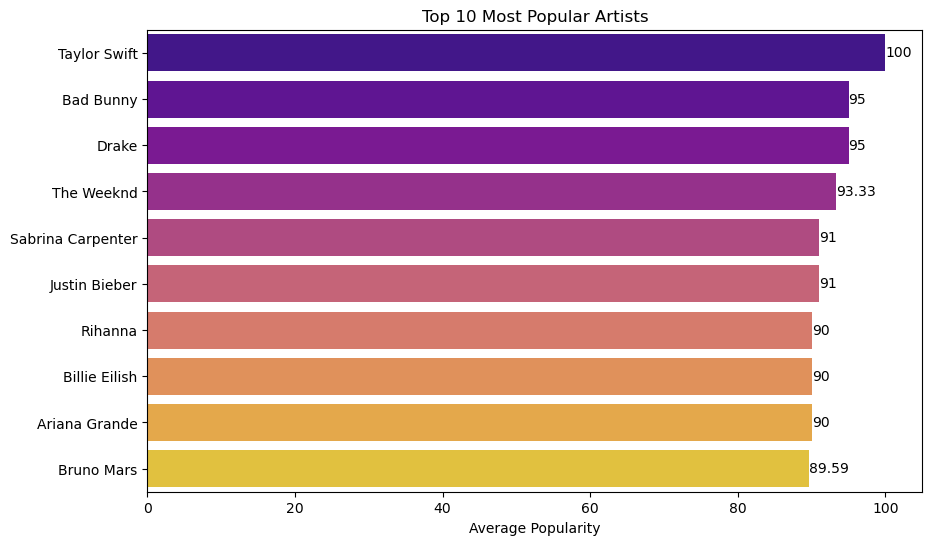

In [17]:
plt.figure(figsize=(10, 6))

cn = sns.barplot(x=most_popular_artist.values, y=most_popular_artist.index, palette='plasma', legend=False)
for container in cn.containers:
  cn.bar_label(container)
plt.title('Top 10 Most Popular Artists')
plt.ylabel('')
plt.xlabel('Average Popularity')

In [18]:
artists_by_releases_names=set(artist_with_most_releases.index)
artists_by_popularity_names=set(most_popular_artist.index)
relation_artists=list(artists_by_releases_names.intersection(artists_by_popularity_names))

print("The common artists are:")
print("-" * 30)

for artists in relation_artists:
    print(f"{artists:<15}")

The common artists are:
------------------------------
Ariana Grande  
The Weeknd     
Taylor Swift   


In [19]:
## Share in total songs
total_songs = len(data)

artist_song_counts = data['artist_name'].value_counts()

market_share = (artist_song_counts / total_songs) * 100

print("Top 10 Artists by Market Share (%):")
print('-'*30)
for artist, share in market_share.head(10).items():
    print(f"{artist:<20}: {share:.2f}%")

Top 10 Artists by Market Share (%):
------------------------------
Taylor Swift        : 3.78%
The Weeknd          : 1.64%
Lana Del Rey        : 1.15%
Ariana Grande       : 1.10%
Nirvana             : 1.06%
Drake               : 0.98%
Post Malone         : 0.97%
The Neighbourhood   : 0.90%
Lady Gaga           : 0.82%
Olivia Rodrigo      : 0.79%


In [20]:
most_released_genre = data['artist_genres'].str.split(', ').explode().value_counts().head()
print("Most released genre")
print("-"*30)
for genre,count in most_released_genre.items():
    print(f"{genre:<15} : {count}")

Most released genre
------------------------------
No Genre        : 3361
pop             : 920
country         : 680
soundtrack      : 450
hip hop         : 431


## Analyzing explicit songs

In [21]:
explicit_count = data['explicit'].value_counts()

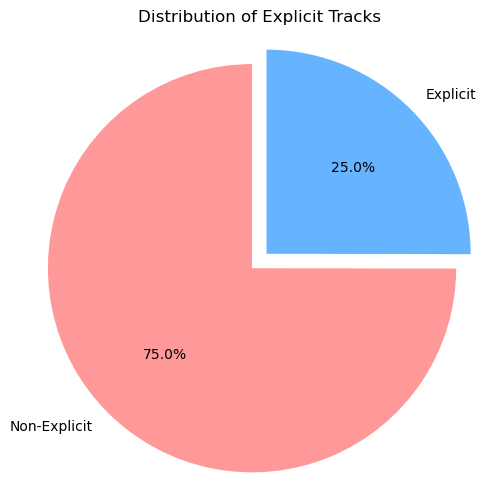

In [22]:
plt.figure(figsize=(6, 6))
explode=(0.1,0)
## Used baby pink color for non explicit songs and light blue for explicit
plt.pie(explicit_count.values, labels=explicit_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'],explode=explode)
plt.title('Distribution of Explicit Tracks')
plt.axis('equal')
plt.show()

In [23]:
avg_popularity_by_explicit = data.groupby('explicit')['track_popularity'].mean()

print("Average Popularity by Explicitness:")
print("-" * 35)

for status, score in avg_popularity_by_explicit.items():
    print(f"{status:<15} : {score:.2f}")

Average Popularity by Explicitness:
-----------------------------------
Explicit        : 57.82
Non-Explicit    : 50.53


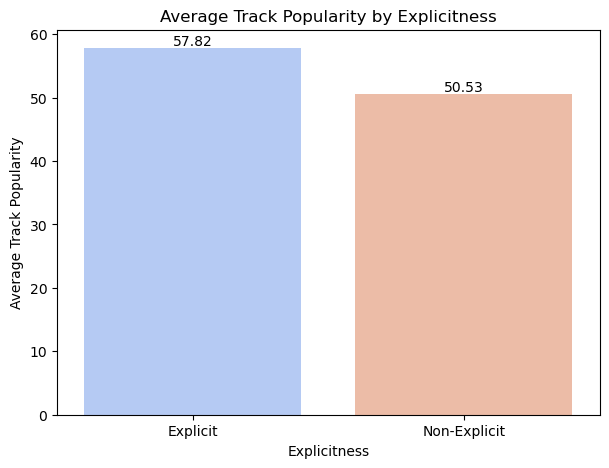

In [24]:
plt.figure(figsize=(7, 5))
cn=sns.barplot(x=avg_popularity_by_explicit.index, y=avg_popularity_by_explicit.values.round(2), palette='coolwarm')
cn.bar_label(cn.containers[0])
cn.bar_label(cn.containers[1])
plt.title('Average Track Popularity by Explicitness')
plt.xlabel('Explicitness')
plt.ylabel('Average Track Popularity')
plt.show()

In [25]:
explicit_artists=data[data['explicit'] == 'Explicit'].groupby('artist_name').size().sort_values(ascending=False).head(5)
print("Top 10 Explicit Artists")
print("-"*30)
for artist,count in explicit_artists.items():
  print(f"{artist:<15} : {count}")

Top 10 Explicit Artists
------------------------------
Drake           : 73
The Weeknd      : 70
Eminem          : 66
Post Malone     : 59
Lil Peep        : 59


## Analyzing Album Types

In [26]:
album_type_counts = data['album_type'].value_counts()
print(album_type_counts)

album_type
album          5856
single         2219
compilation     507
Name: count, dtype: int64


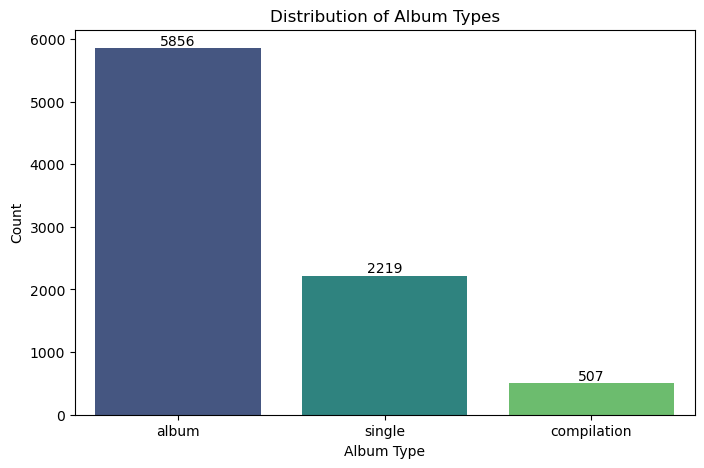

In [27]:
plt.figure(figsize=(8, 5))
cn = sns.barplot(x=album_type_counts.index, y=album_type_counts.values, palette='viridis')
plt.title('Distribution of Album Types')
plt.xlabel('Album Type')
plt.ylabel('Count')
for container in cn.containers:
  cn.bar_label(container)
plt.show()

In [28]:
avg_popularity_by_album_type = data.groupby('album_type')['track_popularity'].mean()
print(avg_popularity_by_album_type)

album_type
album          55.655055
compilation    40.512821
single         46.356467
Name: track_popularity, dtype: float64


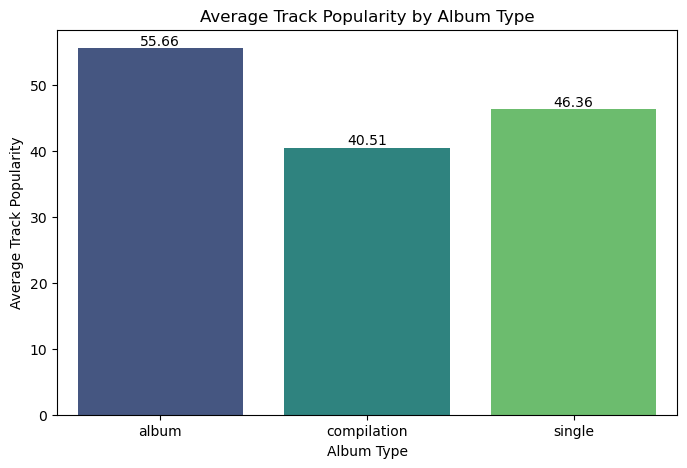

In [31]:
plt.figure(figsize=(8, 5))
cn = sns.barplot(x=avg_popularity_by_album_type.index, y=avg_popularity_by_album_type.values.round(2), 
                 hue=avg_popularity_by_album_type.index, palette='viridis', legend=False)
plt.title('Average Track Popularity by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Average Track Popularity')
for container in cn.containers:
  cn.bar_label(container)
plt.show()

## Analyzing Track Duration


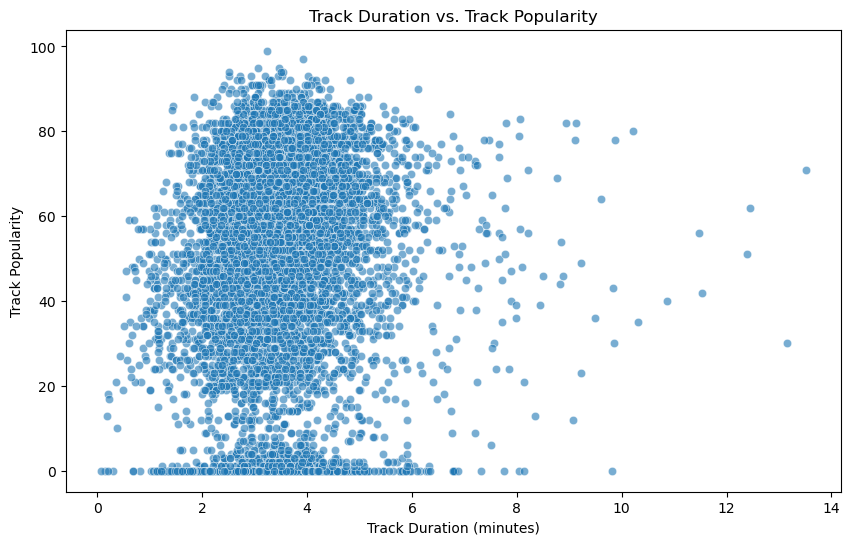

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='track_duration_min', y='track_popularity', data=data, alpha=0.6)
plt.title('Track Duration vs. Track Popularity')
plt.xlabel('Track Duration (minutes)')
plt.ylabel('Track Popularity')
plt.show()

## Key Observations from Spotify Data Analysis

-   **Artist with Most Releases**: `Taylor Swift` leads with `324 releases`, followed by `The Weeknd (141)`, `Lana Del Rey (99)`, `Ariana Grande (94), and Nirvana (91)`. <br>

-   **Most Popular Artists (Average Popularity)**: `Taylor Swift` also tops the list with a perfect average popularity score of `100.00`. Other highly popular artists include `Bad Bunny (95.00)`, `Drake (95.00` `The Weeknd (93.33`), and `Sabrina Carpenter (91.00)`.
-   **Common Artists in Top Releases and Popularity**: `Taylor Swift`, `The Weeknd`, and `Ariana Grande `consistently appear in both the top artists by number of releases and by average popularity, indicating their significant presence and influence.
-   **Artist Market Share**: `Taylor Swift` commands the largest market share with `3.78%` of the total songs, followed by `The Weeknd (1.64%)`, `Lana Del Rey (1.15%)`, `Ariana Grande (1.10%)`, and `Nirvana (1.06%)`.
-   **Most Released Genre**: While 'No Genre' accounts for the largest count due to missing data imputation, 'pop' (920), 'country' (680), 'soundtrack' (450), and 'hip hop' (431) are the most frequently occurring genres.
-   **Missing Data Handled**: Missing values in `artist_name (0.03%)` were imputed as 'Unknown Artist', and `artist_genres (39.16%)` as 'No Genre', ensuring a complete dataset for analysis.
-   **Date Conversion**: The `album_release_date` column was successfully converted to datetime objects, enabling time-based analyses.
-   **Explicit Track Analysis**: `Explicit` tracks make up `25.03%` of the dataset. Interestingly, `'Explicit'` songs have a higher average popularity `(57.82)` compared to `'Non-Explicit'` songs `(50.53)`, suggesting a **correlation between explicitness and track popularity**.
-   **Top Explicit Artists**: Drake (73), The Weeknd (70), Eminem (66), Post Malone (59), and Lil Peep (59) are the artists with the highest number of explicit song releases.
-   **Album Type Distribution**: The majority of releases are 'album' (5856), followed by 'single' (2219), and 'compilation' (507).
-   **Album Popularity**: 'Album' type releases exhibit the highest average track popularity (55.66), followed by 'single' (46.36) and 'compilation' (40.51).
-   **Track Duration vs. Popularity**: The scatter plot revealed that there appears to be an optimal range for track duration, with most popular tracks falling between 2 and 5 minutes. Extremely short or long tracks tend to have lower popularity.